In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [31]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [32]:
df=pd.read_excel(r"d:\dell_backup_25\d-drive\Project_DS\Fraud.xlsx")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [34]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [35]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [36]:
df.isnull().sum().sum()

np.int64(0)

In [37]:
df.shape[0]

1048575

In [38]:
float(round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2))

0.11

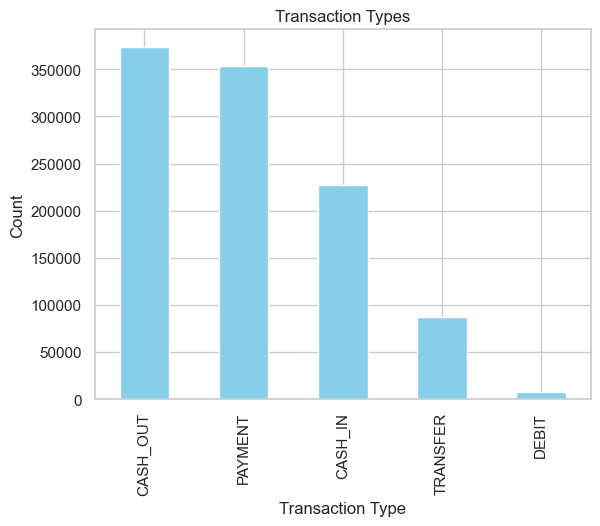

In [39]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

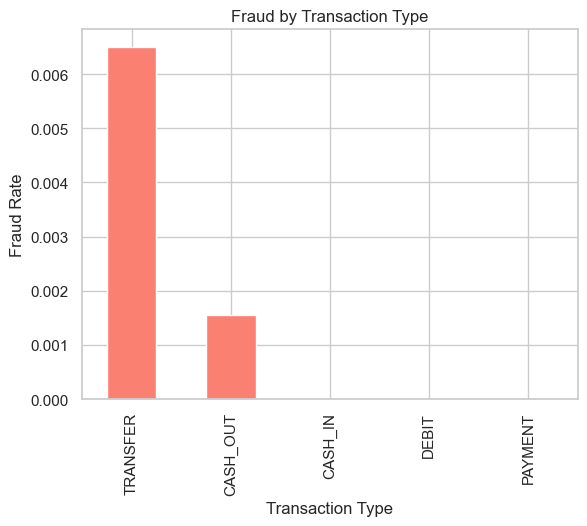

In [40]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", stacked=True, title="Fraud by Transaction Type", color="salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [41]:
fraud_by_type

type
TRANSFER    0.006501
CASH_OUT    0.001547
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [42]:
df["amount"].describe().astype(int)

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int64

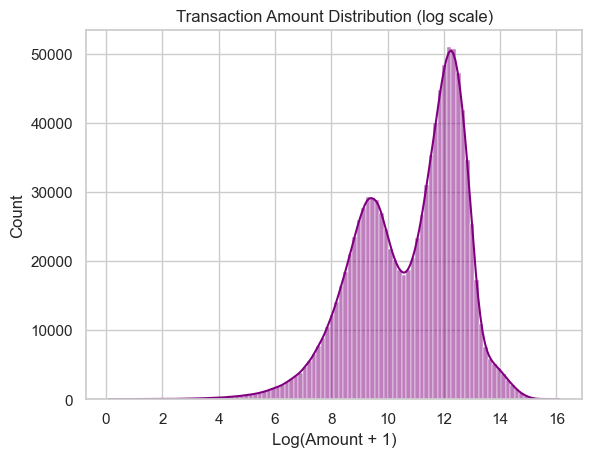

In [43]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='purple')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Count")
plt.show()

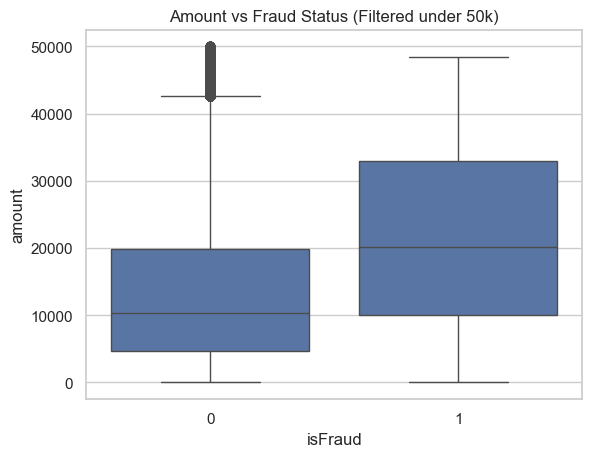

In [44]:
sns.boxplot(data=df[df["amount"]<50000], x="isFraud",y="amount")
plt.title("Amount vs Fraud Status (Filtered under 50k)")
plt.show()

In [45]:
df["balanceDiffOrig"]=df['oldbalanceOrg']-df['newbalanceOrig']
df["balanceDiffDest"]=df['newbalanceDest']-df['oldbalanceDest']

In [46]:
int((df["balanceDiffOrig"] < 0).sum())

227102

In [47]:
int((df["balanceDiffDest"] < 0).sum())

204144

In [48]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


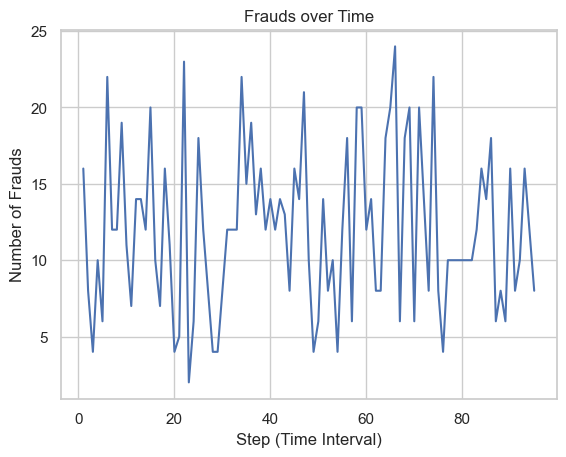

In [49]:
fraud_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label="Frauds per Step")
plt.title("Frauds over Time")
plt.xlabel("Step (Time Interval)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [29]:
df.drop(columns="step", inplace=True)

In [50]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [51]:
top_senders=df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C821145334     2
C693814021     2
C178467166     2
C309111136     2
C2097341930    2
C894095661     2
C1041466144    2
C1322843847    2
C77405061      2
C1561789477    2
Name: count, dtype: int64

In [52]:
top_receivers=df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

In [53]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C409531429     1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C824268591     1
C708686257     1
C395839623     1
C358188091     1
Name: count, dtype: int64

In [54]:
fraud_types=df[df["type"].isin(["CASH_OUT", "TRANSFER"])]

In [55]:
fraud_types["type"].value_counts()

type
CASH_OUT    373641
TRANSFER     86753
Name: count, dtype: int64

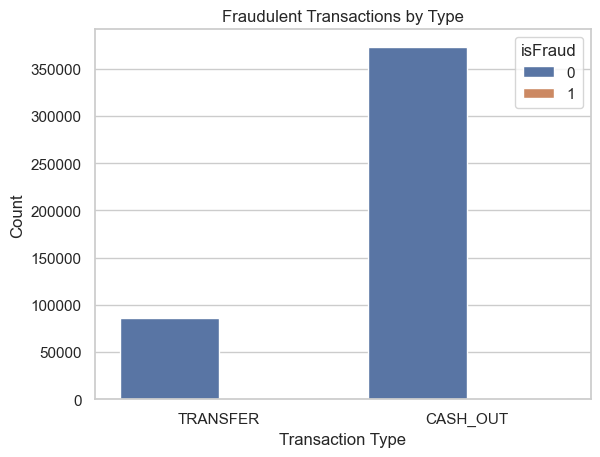

In [56]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraudulent Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count") 
plt.show()

In [57]:
corr=df[["isFraud", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].corr()

In [58]:
corr

,isFraud,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,1.000000,0.128862,0.003829,-0.009438,-0.007553,-0.000495
amount,0.128862,1.000000,0.004864,-0.001132,0.215562,0.311942
oldbalanceOrg,0.003829,0.004864,1.000000,0.999050,0.093305,0.064050
newbalanceOrig,-0.009438,-0.001132,0.999050,1.000000,0.095179,0.063722
oldbalanceDest,-0.007553,0.215562,0.093305,0.095179,1.000000,0.978401
newbalanceDest,-0.000495,0.311942,0.064050,0.063722,0.978401,1.000000


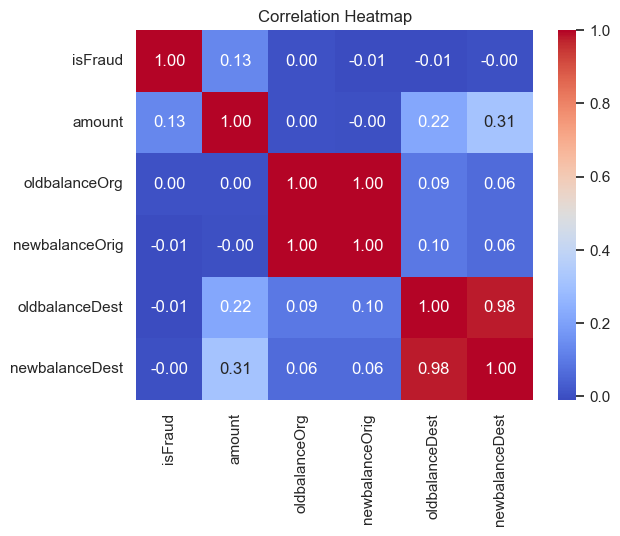

In [59]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [60]:
zero_after_transfer=df[
    (df["oldbalanceOrg"] == 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [61]:
len(zero_after_transfer)

218439

In [62]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
48,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0,0.0,5800793.91
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,0.0,-72666.35
80,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,0.0,-24672.00
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,0.0,173743.05
82,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,0.0,-354678.92


In [63]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [65]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [66]:
df_model=df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"],axis=1)

In [67]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [68]:
categorical=["type"]
numerical=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [69]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [72]:
pipeline=Pipeline([
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight='balanced',max_iter=1000))
])

In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [74]:
y_pred=pipeline.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    314230
           1       0.02      0.97      0.04       343

    accuracy                           0.94    314573
   macro avg       0.51      0.95      0.50    314573
weighted avg       1.00      0.94      0.97    314573



In [76]:
confusion_matrix(y_test, y_pred)

array([[295991,  18239],
       [    11,    332]])

In [77]:
pipeline.score(X_test, y_test)*100

94.19848493036592

In [78]:
import joblib
joblib.dump(pipeline, "fraud_detection_pipeline_model.pkl")

['fraud_detection_pipeline_model.pkl']